In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier

%matplotlib inline
plt.style.use('ggplot')

In [4]:
from gp_sandbox.gaussian_processes import GPBinaryClassifier

In [5]:
n_train = 20
x_train = np.random.uniform(0, 1, n_train)
X_train = x_train.reshape((-1,1))
y_train = 2*(x_train > 0.5)-1

n_test = 200
x_test = np.linspace(0, 1, n_test)
X_test = x_test.reshape((-1,1))
y_test = 2*(x_test > 0.5)-1

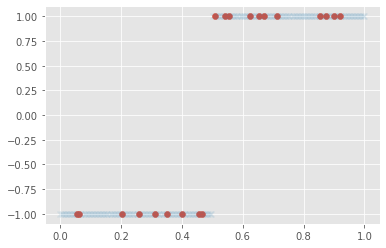

In [6]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='x', alpha=0.1)

In [7]:
gpc = GPBinaryClassifier().fit(X_train, y_train)
gpc.log_marginal_likelihood()

-5.889215236948857

In [8]:
proba, mean, var = gpc.predict(X_test, return_mean_var=True)

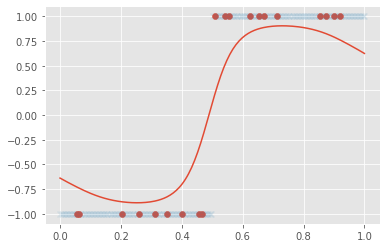

In [9]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='x', alpha=0.1)
plt.plot(x_test, 2*proba-1)

In [10]:
n_sample = 4
proba_sample = gpc.sample(X_test, size=n_sample)

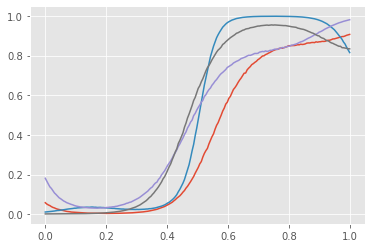

In [11]:
for k in range(n_sample):
    plt.plot(x_test, proba_sample[k, :])

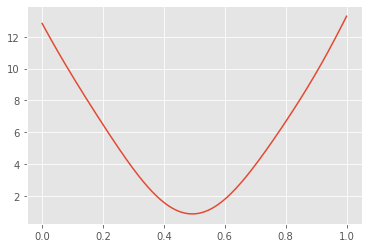

In [12]:
plt.plot(x_test, var.diagonal())